---
title: GSB - S544 Practice Activity 6.2
author: Karissa Mohr
format:
  html:
    embed-resources: true
echo: true
theme: lux
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
!pip install palmerpenguins

In [4]:
import pandas as pd
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [6]:
penguins.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object
year,int64


In [7]:
penguins = penguins.dropna()

In [8]:
# dummify the variables
penguins = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)

In [11]:
penguins[penguins.select_dtypes(bool).columns] = penguins.select_dtypes(bool).astype(int)

In [12]:
penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,2007,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,2007,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,2007,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,2007,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,1,0,1,0,1
340,43.5,18.1,202.0,3400.0,2009,1,0,1,0,0
341,49.6,18.2,193.0,3775.0,2009,1,0,1,0,1
342,50.8,19.0,210.0,4100.0,2009,1,0,1,0,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from palmerpenguins import load_penguins
import numpy as np

In [13]:
y = penguins["bill_depth_mm"]
X = penguins.drop(columns=["bill_depth_mm"])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
models = {
    "Model 1": ['bill_length_mm'],
    "Model 2": ['bill_length_mm', 'flipper_length_mm'],
    "Model 3": ['bill_length_mm', 'flipper_length_mm', 'body_mass_g'],
    "Model 4": list(X.columns)}

In [28]:
rows = []

for name, Xcols in models.items():
    model = LinearRegression().fit(X_train[Xcols], y_train)
    y_train_pred = model.predict(X_train[Xcols])
    y_test_pred = model.predict(X_test[Xcols])

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse  = np.sqrt(mean_squared_error(y_test,  y_test_pred))
    train_r2   = r2_score(y_train, y_train_pred)
    test_r2    = r2_score(y_test,  y_test_pred)

    rows.append({
        "Model": name,
        "Dataset": "Training",
        "RMSE": train_rmse,
        "R²": train_r2
    })
    rows.append({
        "Model": name,
        "Dataset": "Test",
        "RMSE": test_rmse,
        "R²": test_r2
    })

In [29]:
results = pd.DataFrame(rows)
results

,Model,Dataset,RMSE,R²
0,Model 1,Training,1.968306,0.057208
1,Model 1,Test,1.750295,0.014903
2,Model 2,Training,1.614248,0.365880
3,Model 2,Test,1.385717,0.382544
4,Model 3,Training,1.602398,0.375156
5,Model 3,Test,1.417556,0.353844
6,Model 4,Training,0.799035,0.844632
7,Model 4,Test,0.722336,0.832222


From this table, it looks like model 4 is the best because it has the highest R² and lowest RMSE

In [30]:
from plotnine import *

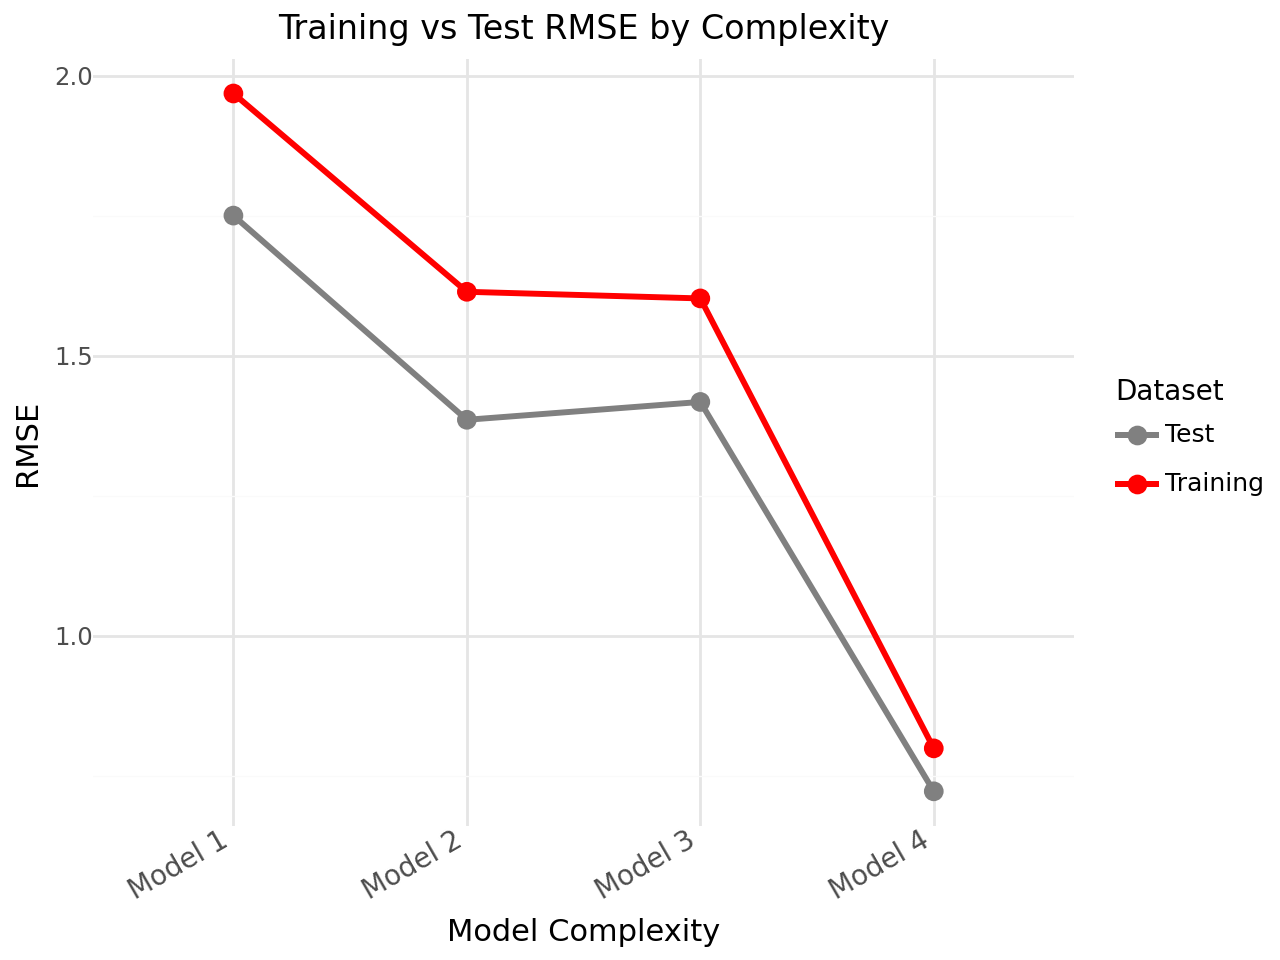

In [33]:
(ggplot(results, aes(x="Model", y="RMSE", color="Dataset", group="Dataset"))
+ geom_line(size=1.2)
+ geom_point(size=3)
+ scale_color_manual(values=["gray", "red"])
+ labs( title="Training vs Test RMSE by Complexity",
        x="Model Complexity",
        y="RMSE"
    )
+ theme_minimal()
+ theme(axis_text_x=element_text(rotation=30, ha="right", size=10),
        plot_title=element_text(size=12),
        legend_title=element_text(size=10),
        legend_text=element_text(size=9)
    )
)